# **AP155 Lab Assignment** 
## Module 5: Ordinary Differential Equations

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible. 

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Problems 1 to 3 are worth 25, 25, and 50 points, respectively).

_Due Date_: **5PM of December 7 (Tue)**


### Student Information 

_Full Name (Last Name, First Name)_: Andeo, Lovely \
_Student No._: 2020-05405\
_Section_: HX4

### Submission Information

_Date and Time Submitted (most recent upload)_: 

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: Lovely Andeo** 

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Problem 1 - []/25
* Problem 2 - []/25
* Problem 3 - []/50

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_ 

### PROBLEM 1 (25 pts.; 50/50 for code & discussion) 
**The Lotka-Volterra equations**

_Refer to Exercise 8.2 in the Newman text._ The Lotka-Volterra equations are a mathematical model of predator-prey interactions between biological species. Let two variables $x$ and $y$ be proportional to the size of the populations of two species, traditionally called "rabbits" (the prey) and "foxes" (the predators). You could think of $x$ and $y$ as being the population in thousands, say, so that $x = 2$ means there are 2000 rabbits. 

In the Lotka-Volterra model the rabbits reproduce at a rate proportional to their population, but are eaten by the foxes at a rate proportional to both their own population and the population of foxes:

$$\frac{{\rm d}x}{{\rm d}t} = \alpha x - \beta xy,$$

where $\alpha$ and $\beta$ are constants. At the same time the foxes reproduce at a rate proportional to the rate at which they eat rabbits-- because they need food to grow and reproduce-- but also die of old age at a rate proportional to their own population:

$$\frac{{\rm d}y}{{\rm d}t}  = \gamma xy - \delta y,$$

where $\gamma$ and $\delta$ are also constants. *(15 pts.)*

1. Solve these equations using the fourth-order Runge-Kutta method for the case $\alpha = 1, \beta = \gamma = 0.5$, and $\delta = 2$, starting from the initial condition $x = y = 2$. 

2. Make a graph showing both $x$ and $y$ as a function of time on the same axes from $t =0$ to $t = 30$. *(10 pts.)*

**Solution**

**1.1** Solving this problem using the fourth-order Runge-Kutta method, first is to import the necessary packages that will be needed.

In [11]:
from numpy import array, arange
import matplotlib.pyplot as plt

Next is to define the constants and the ODEs given in the problem which corresponds to the rate at which the predator and preys reproduce and die. Note that the ODEs with variables $x$ and $y$ are now expressed in vector form of **$r$**.

In [12]:
# Defining the constant paramaters
alpha = 1 
beta = 0.5 
gamma = 0.5 
delta = 2

# Defining a function corressponding to the equations given 
def f(r, t):
    x = r[0] 
    y = r[1]
    fx = alpha * x - beta * x * y # Predator - foxes
    fy = gamma * x * y - delta * y # Prey - rabbits
    return array([fx, fy], float)


Performing the Runge-Kutta method, we first determine $h$ from the given steps and interval. Initialize the values that will be calculated and then apply the initial conditions $x=y=2$ to define the vector $r$. Next, a for loop will be performed to get the solutions using the general equations for 4th-order Runge Kutta method. We also don't forget to append the first values of $r$ as the $x$ values and the second as the $y$ values, since those will be the values that we will plot.

In [13]:
# Defining the interval and steps
a = 0
b = 30
N = 200
h = (b - a) / N

# Initializing the values that we want to calculate
tpoints = arange(a, b, h)
ypoints = []
xpoints = []

# Defining r with the initial conditions
r = array([2, 2], float) 

# Performing the for loop
for t in tpoints:
    xpoints.append(r[0])  # Appending x component
    ypoints.append(r[1])  # Appending y component

    # General equations for RK4
    k1 = h * f(r, t)
    k2 = h * f(r + 0.5 * k1, t + 0.5 * h)
    k3 = h * f(r + 0.5 * k2, t + 0.5 * h)
    k4 = h * f(r + k3, t + h)
    r += 1/6 * (k1 + 2 * k2 + 2 * k3 + k4)



**1.2** To make a graph showing both $x$ and $y$ as a function of time on the same axes from $t =0$ to $t = 30$, we use the matplotlib package that was previously imported.

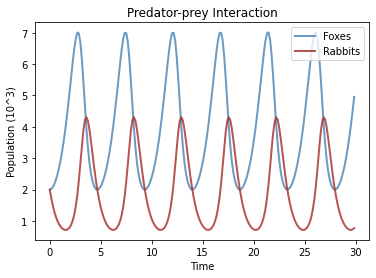

In [10]:
# Plotting x as a function of time
plt.plot(tpoints, xpoints, color = 'steelblue', label = 'Foxes', linewidth = 2, alpha=0.8)

# Plotting y as a function of time
plt.plot(tpoints, ypoints, color = 'brown', label = 'Rabbits', linewidth = 2, alpha=0.8 )

# Customizing the plot with labels and legends
plt.title('Predator-prey Relationship')
plt.xlabel("Time")
plt.ylabel("Population (10^3)")
plt.legend()

# Displaying the plot
plt.show()

From the graph, we can see that at $t=0$, the population of the rabbits decreases as that of the foxes increases, since the more rabbits the foxes eat, the more they'll reproduce. But eventually, as the number of rabbits decrease, the less food there will be for the foxes leading some to a possibility of starving and dying. But we can also notice that population of rabbits peak when there are relatively less foxes, since there will be less prey to haunt them.

### PROBLEM 2 (25 pts.; 50/50 for code & discussion)

**Nonlinear pendulum**

_Refer to Exercise 8.4 in the Newman text._ Building on the results from Example 8.6, calculate the motion of a nonlinear pendulum as follows.

1. Solve the two first-order equations, Eqs. (8.45) and (8.46), using the fourth-order Runge-Kutta method for a pendulum with a 10 cm arm. Use your program to calculate the angle $\theta$ of displacement for several periods of the pendulum when it is released from a standstill at $\theta = 179^\circ$ from the vertical. *(15 pts.)*

2. Make a graph of $\theta$ as a function of time. *(10 pts.)*


**Solution**

**2.1** Equations 8.45 and 8.46 are given by 
$$\dfrac{d\theta}{dt} = \omega, \ \ \dfrac{d\omega}{dt} = -\dfrac{g}{l}\sin \theta$$

Now, we again combine the two variables into a single vector  as such
$$\bold{r} = (\theta, \omega)$$
then we apply the fourth-order Runge-Kutta method. First, we import the necessary packages.

In [2]:
from numpy import array, arange
from math import sin
import matplotlib.pyplot as plt


Next is to define the given constants given and involved in the problem: the value of the accelaration due to gravity $g$ and the length $l$ of the pendulum's arm. To also make sure that we are working with the same units, we convert $l$ from cm to m.

In [5]:
# Defining the given values
l = 0.1  # Unit is m
g = 9.81  # Unit is m/s^2

Then again, the variables $\theta$ and $\omega$ are now expressed in vector form of **$r$**. Hence, we define the function with that, plus the ODEs given.

In [ ]:
# Defining a function corressponding to the equations given 
def f(r, t):
    theta = r[0]
    omega = r[1]

    # The equations 8.45 and 8.46
    ftheta = omega
    fomega = (-g/l)* sin(t)
    return array([ftheta, fomega], float)

Using the Runge-Kutta method, we first determine $h$ from the given steps and interval. Initialize the values that will be calculated and then apply the initial conditions to define the vector $r$ in whichh for this problem is the angle from a standstill, $\theta = 179^\circ$ . Next, a for loop will be performed to get the solutions using the general equations for 4th-order Runge Kutta method. We can also just append the first values of $r$ as the $x$ or theta values and disregard the values for $\omega$ since we're only concerned of $\theta$.

In [18]:
# Defining the interval and steps
a = 0
b = 10
N = 100
h = (b - a) / N

# Initializing the values that we want to calculate
tpoints = arange(a, b, h)
theta_points = []

# Defining r with the initial angle from a standstill
r = array([170, 0], float) 

for t in tpoints:
    # Appending only the theta values 
    theta_points.append(r[0]) 
    
    # General equations for RK4
    k1 = h * f(r, t)
    k2 = h * f(r + 0.5 * k1, t + 0.5 * h)
    k3 = h * f(r + 0.5 * k2, t + 0.5 * h)
    k4 = h * f(r + k3, t + h)
    r += 1/6 * (k1 + 2 * k2 + 2 * k3 + k4)

**2.2** Finally, our task is to graph $\theta$ as a function of time wherein from the values we got, tpoint corresponds to time and theta_points correspoints to the angle of displacement, theta.

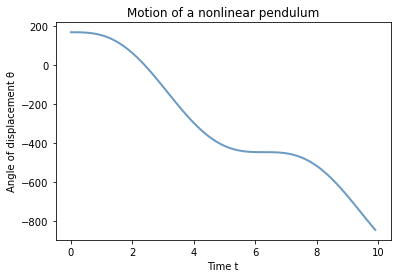

In [19]:
# Plotting θ as a function of time
plt.plot(tpoints, theta_points, color = 'steelblue', label = 'Foxes', linewidth = 2, alpha=0.8)

# Customizing the plot with labels
plt.title('Motion of a nonlinear pendulum')
plt.xlabel("Time t")
plt.ylabel("Angle of displacement θ")

# Displaying the plot
plt.show()

### PROBLEM 3 (50 pts.; 50/50 for code & discussion)

**Quantum Oscillators**

_Refer to Exercise 8.14 of the Newman text_ Consider the one-dimensional, time-independent Schrodinger equation in a harmonic (i.e., quadratic) potential $V(x) = V_0 x^2 / a^2$, where $V_0$ and $a$ are constants. 

1. Modify the code from Example 8.9 to find the energies of the ground state and the first two excited states for this potential when $m$ is the electron mass, $V_0 = 50$ eV, and $a = 10^{-11}$ m. Note that in theory the wavefunction goes all the way out to $x = \pm \infty$, but you can get good answers by using a large but finite interval. Try using $x = - 10a$ to $+10a$, with the wavefunction $\psi = 0$ at both boundaries. (In effect, you are putting the harmonic oscillator in a box with impenetrable walls.) The wavefunction is real everywhere, so you don't need to use complex variables, and you can use evenly spaced points for the solution-- there is no need to use an adaptive method for this problem.

   The quantum harmonic oscillator is known to have energy states that are equally spaced. Check that this is true, to the precision of your calculation, for your answers. (Hint: The ground state has energy in the range 100 to 200eV.) *(20 pts.)*

2. Modify the code from (1) to calculate the same three energies for the anharmonic oscillator with $V(x) = V_0 x^4 /a^4$, with the same parameter values. *(10 pts.)*

3. Calculate the properly normalized wavefunctions of the anharmonic oscillator for the three states. To normalize the wavefunctions you will have to calculate the value of the integral $\int_{-\infty}^{+\infty} |\psi(x)|^2 {\rm d}x$ and then rescale $\psi$ appropriately to ensure that the area under the square of each of the wavefunctions is 1. Either the trapezoidal rule or Simpson's rule will give you a reasonable value for the integral. *(15 pts.)*

   Note that you may find a few very large values at the end of the array holding the wavefunction. Where do these large values come from? Are they real, or spurious? One simple way to deal with the large values is to make use of the fact that the system is symmetric about its midpoint and calculate the integral of the wavefunction over only the left-hand half of the system, then double the result. This neatly misses out the large values. 

4. Make a plot of the normalized wavefunctions from (3), all on the same axes, as a function of $x$ over a modest range near the origin-- say $x = -5a$ to $x =+5a$. *(5 pts.)*

